In [37]:
import pandas as pd
import numpy as np
import scipy
import random

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_name = '../data/AdSmartABdata.csv'
ad_df = pd.read_csv(file_name)


In [3]:
"""
1. Hypothesis
Null Hypothesis (Ho) => change in the advertisement design wont make a significant brand awareness

Alternate Hypothesis (Ha) => Change to the createive design will make siginificant brand awarness
"""

'\n1. Hypothesis\nNull Hypothesis (Ho) => change in the advertisement design wont make a significant brand awareness\n\nAlternate Hypothesis (Ha) => Change to the createive design will make siginificant brand awarness\n'

In [4]:
ad_df.shape

(8077, 9)

In [5]:
ad_df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [6]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [7]:
ad_df.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

<AxesSubplot:ylabel='experiment'>

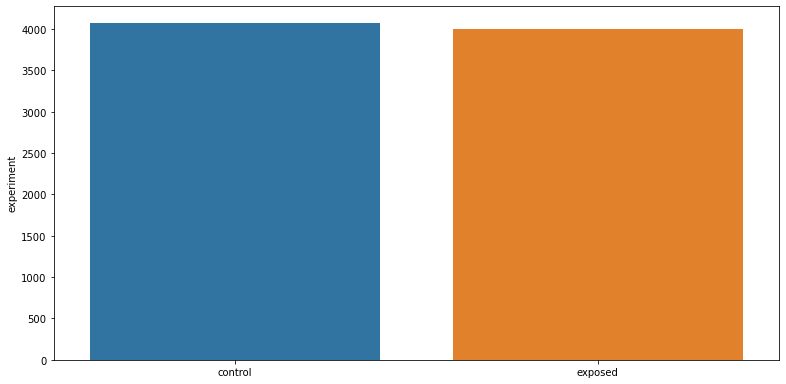

In [8]:
# Size count of exposed and control

result = ad_df['experiment'].value_counts()
plt.figure(figsize=(13, 6.5))
sns.barplot(x=result.index, y=result)

<AxesSubplot:xlabel='experiment', ylabel='yes'>

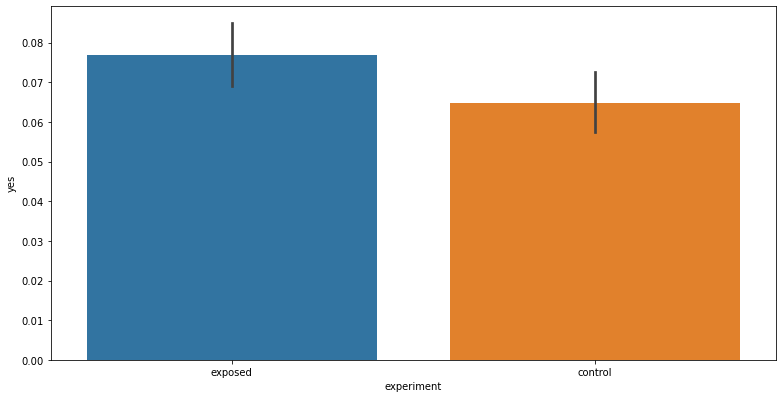

In [9]:
# yes counts on experiments sets

plt.figure(figsize=(13, 6.5))
sns.barplot(data=ad_df, x='experiment', y='yes')

<AxesSubplot:ylabel='date'>

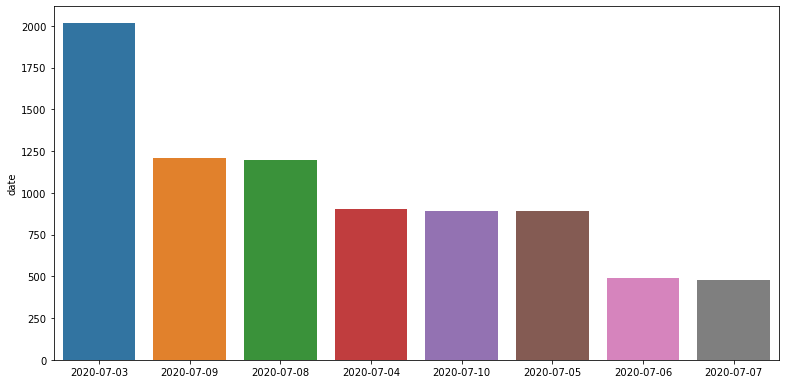

In [10]:
# count dates

result = ad_df['date'].value_counts()
plt.figure(figsize=(13, 6.5))
sns.barplot(y=result, x=result.index )

<AxesSubplot:ylabel='hour'>

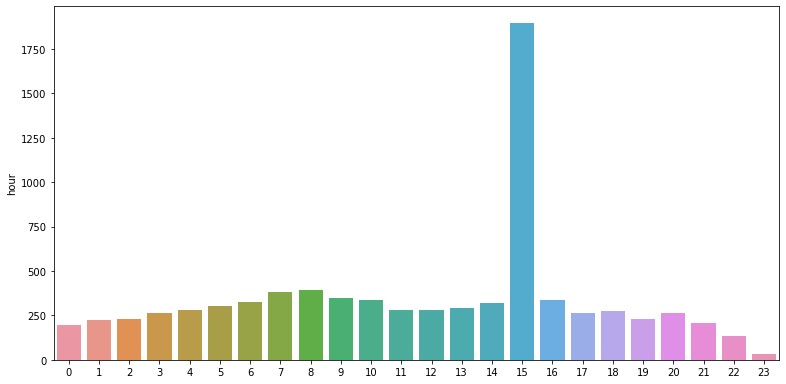

In [11]:
# Most frequesnt hours

result = ad_df['hour'].value_counts()
plt.figure(figsize=(13, 6.5))
sns.barplot(y=result, x=result.index )

<AxesSubplot:ylabel='browser'>

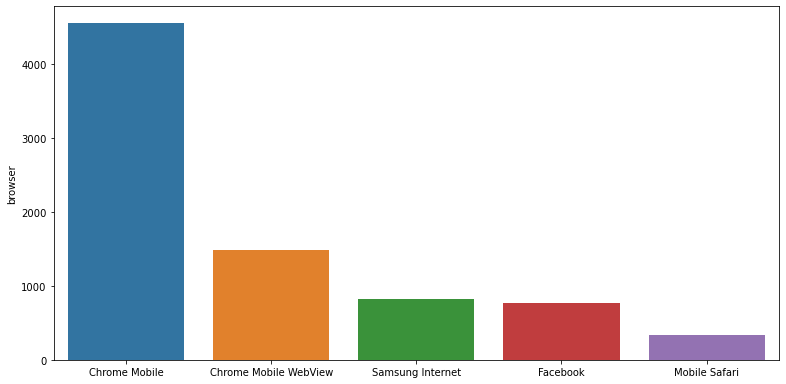

In [12]:
# Most frequesnt browsers

browser = ad_df['browser'].value_counts().head(5)
plt.figure(figsize=(13, 6.5))
sns.barplot(x=browser.index, y=browser)
# plt.xticks(rotation= 20)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Generic Smartphone'),
  Text(1, 0, 'iPhone'),
  Text(2, 0, 'Samsung SM-G960F'),
  Text(3, 0, 'Samsung SM-G973F'),
  Text(4, 0, 'Samsung SM-G950F'),
  Text(5, 0, 'Samsung SM-G930F'),
  Text(6, 0, 'Samsung SM-G975F'),
  Text(7, 0, 'Samsung SM-A202F'),
  Text(8, 0, 'Samsung SM-A405FN'),
  Text(9, 0, 'Samsung SM-J330FN')])

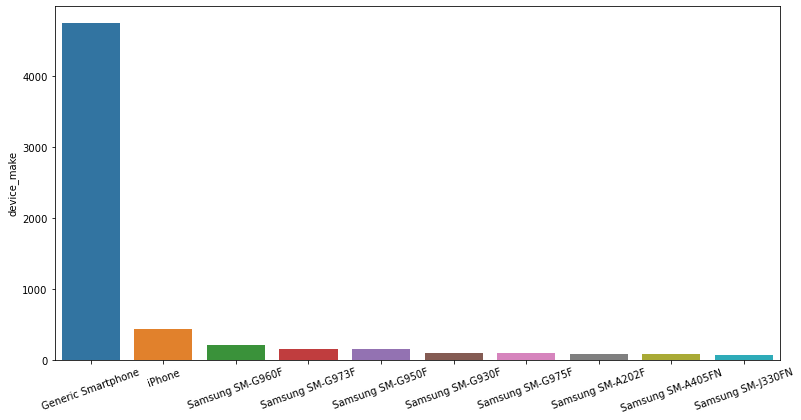

In [13]:
# Mostly used Devices


device = ad_df['device_make'].value_counts().head(10)
plt.figure(figsize=(13, 6.5))
sns.barplot(x=device.index, y=device)
plt.xticks(rotation= 20)

<AxesSubplot:ylabel='platform_os'>

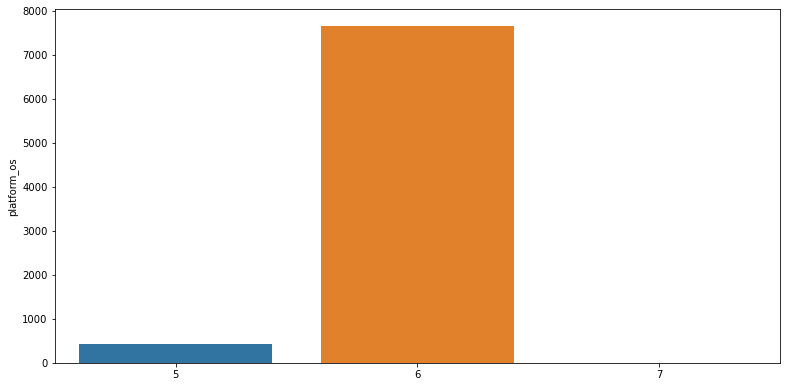

In [14]:
# Mostly used platforms

device = ad_df['platform_os'].value_counts()
plt.figure(figsize=(13, 6.5))
sns.barplot(x=device.index, y=device)
# plt.xticks(rotation= 20)

In [45]:
clean_control.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,converted
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,1
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,0
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0,1
48,01985992-d70b-4258-a3a1-60ac5e17bce6,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,0
62,023458f7-122d-475f-9525-1b9a3cc7a033,control,2020-07-03,15,MRD-LX1,6,Facebook,0,1,0


In [23]:
clean_exposed.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,converted
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,0
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,1
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1,0
39,013e45cf-e388-46a4-9c5b-a34303613940,exposed,2020-07-10,2,Generic Smartphone,6,Chrome Mobile,0,1,0
46,01905bae-fc59-475e-b2b4-09b78163c961,exposed,2020-07-05,6,I3312,6,Chrome Mobile WebView,0,1,0
